# Tutorial 3
Before we start, let's import our libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Finite differencing and the explicit Euler method

Today we want to solve the oscillator problem (again). But this time, we do not rely on a fancy ODE solver like the `odeint`. Instead, we want to solve the problem with a [finite difference](https://en.wikipedia.org/wiki/Finite_difference_method) method.

The finite difference method is a numerical method to solve differential equations. The broad idea behind the method is to approximate the differential with a discrete difference. For example, in our oscillator problem, we have the time derivative of $x$. This can be *discretised* as 

\begin{equation}
\frac{dx}{dt} \approx \frac{x(t+\Delta t) - x(t)}{\Delta t}\tag{1}.
\end{equation}

The process of approximating a continuous quantity with its discrete form is called *discretisation*.

Say now we have an ODE

\begin{equation}
\frac{dx}{dt} = F(t,x(t))\tag{2},
\label{eq:differential}
\end{equation}

discretising this yields
\begin{equation}
x(t+\Delta t) = x(t) + \Delta t \, F(t,x(t)) \tag{3} \label{eq:discretised}
\end{equation}

Generally, we write equation \eqref{eq:discretised} as 
\begin{equation}
x^{n+1} = x^n + \Delta t \, F(t^n,x^n), \tag{4}\label{eq:euler_method}
\end{equation}

where $n$ indexes the time-step at time $t$ and $n+1$ indexes the time-step at $t+\Delta t$. Note that the notion of a "time-step" now makes sense, as we are integrating the problem discretely in time.

Given a time-step size of $\Delta t$, if we have the solution $(t^n,x^n)$ at time $n$, then we can evaluate the right-hand side of \eqref{eq:euler_method}, and this gives us the solution of $x$ at the new time $n+1$.

The method of numerically integrating an ODE with \eqref{eq:euler_method} is also known as the [explicit Euler method](https://en.wikipedia.org/wiki/Euler_method).

Now that we have some idea on a finite difference method, let's apply it...

## Setting up the harmonic oscillator problem

We want to use the simple harmonic oscillator problem without damping and without forcing as an exercise to get an intuition of the finite difference numerical methods:
$$m \ddot{x} = -c x, \qquad m,c > 0. \tag{5}$$

The analytical solution to this free oscillation scenario is on page 20, equation (75) of the lecture notes,

$$x(t) = a \cos(\omega t) + b \sin(\omega t), \tag{6}$$

where $\omega=\sqrt{c/m}$.

We can make our lives much easier by choosing the constants $c,m=1$, the initial position $x(t=0)=0$, and the initial velocity $\dot{x}(t=0)=1$. This gives us the following analytical solutions:
$$\begin{align}
x        &= \sin(t), \tag{7a}\\
\dot{x}  &= \cos(t), \tag{7b}\\
\ddot{x} &= -x. \tag{7c}
\end{align}$$
This is equivalent to
$$\begin{align}
\frac{dx}{dt}        &= \dot{x}, \tag{8a}\\
\frac{d\dot{x}}{dt}  &= -x. \tag{8b}
\end{align}$$

Discretising this with the explicit Euler method,
$$\begin{align}
x^{n+1}       &= x^n + \Delta t \, \dot{x}^n, \tag{9a}\\
\dot{x}^{n+1} &= \dot{x}^n - \Delta t \, x^n. \tag{9b}
\label{eq:ee_discretised}
\end{align}$$

Please go through the working above on your own to verify that it makes sense!

In [4]:
# Some helper functions for plots
def xt_plot(t, x, xth=None, title="", ylabel="x"):
    plt.plot(t, x, label='num. x')
    if xth is not None:
        plt.plot(t, xth, '--', label='theo. x')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.ylabel(ylabel)
    if len(title) > 0:
        plt.title(title)
    plt.grid()
    plt.show()

def vx_plot(x, v, xth, vth, title=""):
    plt.plot(x,v, label="num. sol.")
    plt.plot(xth,vth, '--', label="theo. sol.")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("v")
    if len(title) > 0:
        plt.title(title)
    plt.show()

## Exercise 1: The explicit Euler method 
1. Implement equation ([9](#mjx-eqn-eq:ee_discretised)). How would you do it?
2. Compare the result for various step-sizes, e.g. `dt=0.1` and `dt=0.01`.
3. Plot $\dot{x}$ against $x$ for the numerical and the analytical solution. What do you see?
4. We know that the potential energy in a spring is given by $PE=\frac{1}{2}kx^2$ while the kinetic energy of the spring is $KE=\frac{1}{2}mv^2$. Compute and compare the energy of the numerical solution with the theoretical energy. What happens with the energy?

### Hints:

1. We will need a *for-loop*. A short introduction to the features of the for-loop in Python is provided in the supplementary materials.
2. What are we looping over?
3. What do we have to do in each step of the loop?

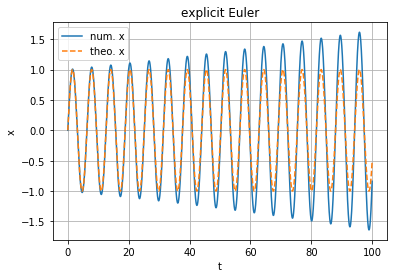

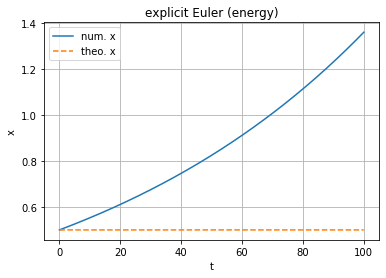

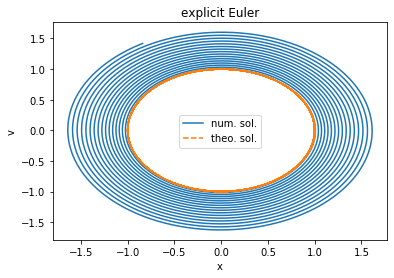

In [4]:
# Here are some helper code to get you started.

# Let's specify the number of time-steps
Nt = 10000
# and a time-step size
dt = 0.01

# What are numpy.arange and numpy.zeros?
# Why do we need to initialise these arrays?
t = np.arange(Nt+1)*dt
x = np.zeros((Nt+1))
v = np.zeros((Nt+1))

# Since we know the analytical solution,
# let's compare our numerical solution against them.
xth = np.sin(t)
vth = np.cos(t)

v[0] = 1.0

for idx in range(Nt):
    x[idx+1] = x[idx] + dt * v[idx]
    v[idx+1] = v[idx] - dt * x[idx]
    
x = np.array(x)
v = np.array(v)
energy = 0.5 * x**2 + 0.5 * v**2
th_e = 0.5 * xth**2 + 0.5 * vth**2

xt_plot(t,x,xth, title="explicit Euler")
xt_plot(t,energy,xth=th_e, title="explicit Euler (energy)")
vx_plot(x,v,xth,vth, title="explicit Euler")

## Exercise 2: Euler-A and Euler-B methods
Notice that our discretisation of equation ([2](#mjx-eqn-eq:differential)) is not unique, and there are actually many ways to discretise a differential. For example, we can write equation ([4](#mjx-eqn-eq:euler_method)) as

$$x^{n+1} = x^n - \Delta t \, F(t^{n+1},x^{n+1}), \tag{10} \label{eq:implicit_euler} $$

which would give us the [implicit Euler method](https://en.wikipedia.org/wiki/Backward_Euler_method).

For the system of equations we are solving in ([9](#mjx-eqn-eq:ee_discretised)), we can apply the [semi-implicit Euler method](https://en.wikipedia.org/wiki/Semi-implicit_Euler_method). This is given by the following updates:

a. For the Euler-A method:
$$\begin{align}
x^{n+1}       &= x^n + \Delta t \, \dot{x}^n, \tag{11a}\\
\dot{x}^{n+1} &= \dot{x}^n - \Delta t \, x^{n+1}. \tag{11b}
\label{eq:euler_a}
\end{align}$$
b. For the Euler-B method:
$$\begin{align}
\dot{x}^{n+1} &= \dot{x}^n - \Delta t \, x^{n}, \tag{12a}\\
x^{n+1}       &= x^n + \Delta t \, \dot{x}^{n+1}. \tag{12b}
\label{eq:euler_b}
\end{align}$$

Now on to the tasks:
1. Implement equations ([11](#mjx-eqn-eq:euler_a)) and ([12](#mjx-eqn-eq:euler_b)).
2. Again, try around with different number of time-steps and time-step sizes.
3. Plot $\dot{x}$ against $x$ for the numerical and analytical solutions. What do you observe?
4. Can you explain your observation?
5. Again, let's compare the energy of the numerical solution with the theoretical energy.

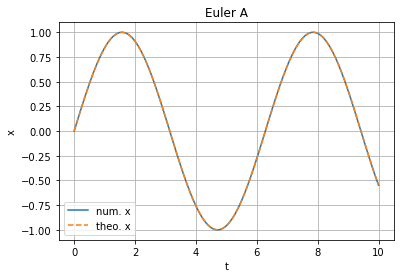

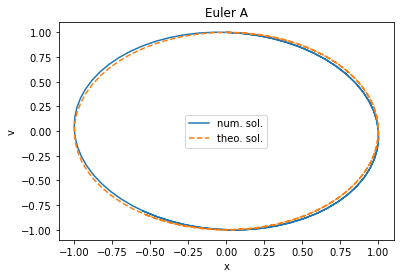

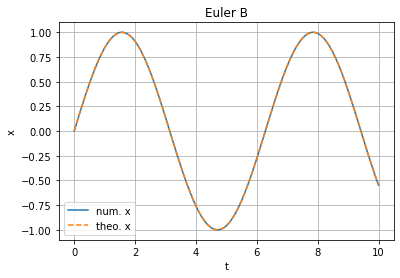

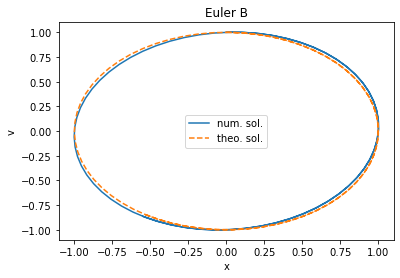

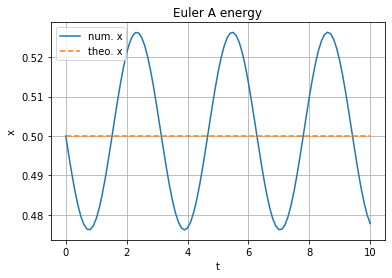

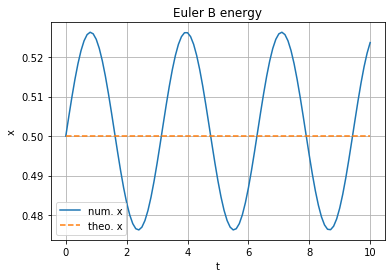

In [146]:
Nt = 100
dt = 0.1
t = np.arange(Nt+1)*dt

xth = np.sin(t)
vth = np.cos(t)

# Euler-A
xa = np.zeros((Nt+1))
va = np.zeros((Nt+1))

va[0] = 1.0

for idx in range(Nt):
    xa[idx+1] = xa[idx] + dt * va[idx]
    va[idx+1] = va[idx] - dt * xa[idx+1]
    
xt_plot(t, xa, xth, title="Euler A")
vx_plot(xa,va,xth,vth, title="Euler A")

# Euler-B
xb = np.zeros((Nt+1))
vb = np.zeros((Nt+1))

vb[0] = 1.0

def euler_b(xb,vb,dt,Nt):
    for idx in range(Nt):
        vb[idx+1] = vb[idx] - dt * xb[idx]
        xb[idx+1] = xb[idx] + dt * vb[idx+1]
        
    energy = 0.5 * xb**2 + 0.5 * vb**2
    return xb, vb, energy 

xb, vb, energy = euler_b(xb, vb, dt,Nt)


def euler_c(xc,vc,dt,Nt):
    for idx in range(Nt):
        xc[idx+1] = xc[idx] + 0.5 *dt * vc[idx]
        vc[idx+1] = vc[idx] - 1.0 * dt * xc[idx+1]
        xc[idx+1] = xc[idx] + 0.5* dt * vc[idx+1]
        
    energy = 0.5 * xb**2 + 0.5 * vb**2
    return xb, vb, energy 

xb, vb, energy = euler_b(xb, vb, dt,Nt)

eth = 0.5 * xth**2 + 0.5 * vth**2
e_a = 0.5 * xa**2 + 0.5 * va**2

xt_plot(t, xb, xth, title="Euler B")
vx_plot(xb,vb,xth,vth, title="Euler B")

xt_plot(t, e_a, eth, title="Euler A energy")
xt_plot(t, energy, eth, title="Euler B energy")

In [ ]:
def euler_c(x,v,dt,Nt):
    for idx in range(Nt):
        x[idx+1] = x[idx] + 0.5 * dt * v[idx]    
        v[idx+1] = v[idx] - 1.0 * dt * x[idx+1]
        x[idx+1] = x[idx+1] + 0.5 * dt * v[idx+1]
    energy = 0.5 * x**2 + 0.5 * v**2
    return x, v, energy        

[1.0, 10.0, 100.0, 1000.0, 10000.0]
[1.12041156 1.15050957 1.20061426 1.29994154 1.5797836 ]


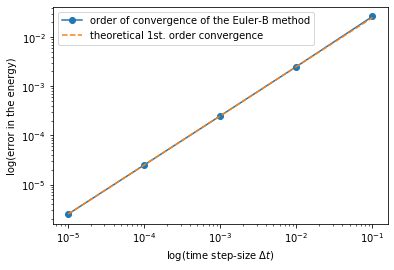

In [6]:
dts = [0.00001,0.0001,0.001,0.01,0.1]
err = []


Nt = 100000

def euler_b(xb,vb,dt,Nt):
    for idx in range(Nt):
        vb[idx+1] = vb[idx] - dt * xb[idx]
        xb[idx+1] = xb[idx] + dt * vb[idx+1]
        
    energy = 0.5 * xb**2 + 0.5 * vb**2
    return xb, vb, energy 

for dt in dts:
    xb = np.zeros((Nt+1))
    vb = np.zeros((Nt+1))
    vb[0] = 1.0
    
    t = np.arange(Nt+1)*dt

    xth = np.sin(t)
    vth = np.cos(t)
    eth = 0.5*xth**2 + 0.5*vth**2
    
    _, _, energy = euler_b(xb,vb,dt,Nt)
    err_in_energy = np.abs(energy - eth).max()
    err.append(err_in_energy)
    
err_th = [ (10**expn)**1.0 for expn in range(len(dts))]
print(err_th)
err_th = np.array(err_th) * err[0]

print(np.log(err) / np.log(dts))

plt.figure()
plt.loglog(dts, err, '-o', label='order of convergence of the Euler-B method')
plt.loglog(dts, err_th, '--', label='theoretical 1st. order convergence')
plt.loglog()
plt.ylabel(r"log(error in the energy)")
plt.xlabel(r"log(time step-size $\Delta t$)")
plt.legend()
plt.show()

## Exercise 3: The Störmer-Verlet method
The explicit Euler and the semi-implicit Euler methods are [*first-order methods*](https://en.wikipedia.org/wiki/Truncation_error_(numerical_integration)#Local_truncation_error). We now turn our attention to the [Störmer-Verlet method](https://en.wikipedia.org/wiki/Verlet_integration), which is a second-order numerical integrator.

The discretised equations are:
$$\begin{align}
\dot{x}^{n+1/2}    &= \dot{x}^n       - \frac{\Delta t}{2} \, x^n,     \label{eq:sv1} \tag{13a}\\
           x^{n+1} &= x^n             + \Delta t \, \dot{x}^{n+1/2},   \label{eq:sv2} \tag{13b}\\
\dot{x}^{n+1}      &= \dot{x}^{n+1/2} - \frac{\Delta t}{2} \, x^{n+1}. \label{eq:sv3} \tag{13c}\\
\end{align}$$

Notice that ([13a](#mjx-eqn-eq:sv1)) is akin to an explicit Euler update, ([13b](#mjx-eqn-eq:sv2)) is a [midpoint method](https://en.wikipedia.org/wiki/Midpoint_method), and ([13c](#mjx-eqn-eq:sv3)) is an implicit update.

Now, for the tasks:
1. Implement equation ([13](#mjx-eqn-eq:sv3)).
2. Plot $\dot{x}$ against $x$ for the numerical and analytical solutions. What do you observe?
3. Plot $v$ and $x$ and the energy. Are these results in line with your expectations?
4. Plot the intermediate time steps in ([13a](#mjx-eqn-eq:sv1)). What do you observe?

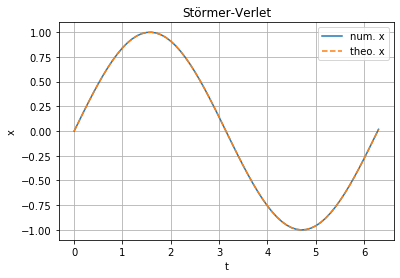

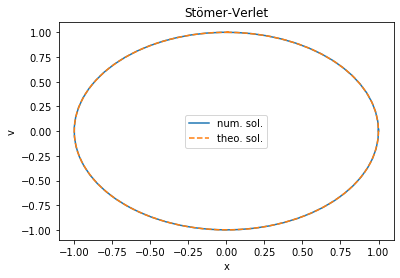

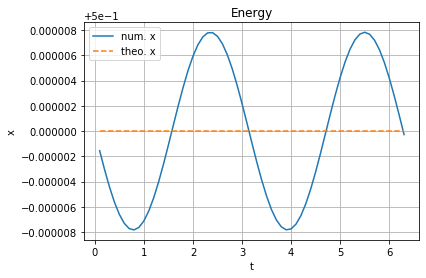

In [187]:
dt = 0.1
Nt = int(np.ceil(2.0 * np.pi / dt))

t = np.arange(Nt+1)*dt
x = np.zeros((Nt+1))
v = np.zeros((Nt+1))
intermediate = np.zeros((Nt+1))

xth = np.sin(t)
vth = np.cos(t)

v[0] = 1.0

def sVerlet(x,v,dt):
    for idx in range(Nt):
        intermediate[idx] = v[idx] - 0.25 * dt * x[idx]
        x[idx+1] = x[idx] + 0.5 * dt * intermediate[idx]
        v[idx+1] = intermediate[idx] - 0.25 * dt * x[idx+1]
        
        intermediate[idx] = x[idx+1] + 0.25 * dt * v[idx+1]
        v[idx+1] = v[idx+1] - 0.5 * dt * intermediate[idx]
        x[idx+1] = intermediate[idx] + 0.25 * dt * v[idx+1]
        
    energy = 0.5 * x**2 + 0.5 * v**2
    return x, v, energy

# x[1] = x[0] + dt * v[0] - 0.5 * dt * dt * (x[0] + 1.0 * dt * v[0])
# for idx in range(1,Nt):
#     pass
# #     intermediate[idx] = x[idx] + 0.5 * dt * v[idx]
# #     v[idx+1] = v[idx] - dt * x[idx] + 0.5 * dt * v[idx]
# #     x[idx+1] = x[idx] + 1.0 * dt * v[idx] - 0.5 * dt * dt * x[idx] + 0.5 * 0.5 * dt * dt * v[idx]
#     x[idx+1] = x[idx] + dt * v[idx] - 0.5 * dt * dt * (x[idx] + 0.5 * dt * v[idx])
# v[idx] = (x[idx+1] + x[idx-1]) / (2.0 * dt)
# 
#     x[idx+1] = 2.0 * x[idx] - x[idx-1] - 1.0 * dt * dt * (x[idx] + 1.0 * dt * (np.random.random()-0.5)*2.0)

x, v, energy = sVerlet(x,v,dt)
energy = 0.5 * x**2 + 0.5 * v**2
eth = 0.5 * xth**2 + 0.5 * vth**2

xt_plot(t,x,xth, title="Störmer-Verlet")
vx_plot(v,x,xth,vth, title="Stömer-Verlet")
xt_plot(t[1:],energy[1:],eth[1:], title="Energy")

In [157]:
def sVerlet(x,v,dt):
    for idx in range(Nt):        
        
        # v[idx] = (x[idx+1] + x[idx-1]) / (2.0 * dt) 
        x[idx+1] = 2.0 * x[idx] - x[idx-1] - 1.0 * dt * dt * ( x[idx] + 0.5 * v[idx] )

In [ ]:
intermediate[idx] = v[idx] - 0.25 * dt * x[idx]
x[idx+1] = x[idx] + 0.5 * dt * intermediate[idx]
v[idx+1] = intermediate[idx] - 0.25 * dt * x[idx+1]

intermediate[idx] = x[idx+1] + 0.25 * dt * v[idx+1]
v[idx+1] = v[idx+1] - 0.5 * dt * intermediate[idx]
x[idx+1] = intermediate[idx] + 0.25 * dt * v[idx+1]

100%|██████████| 5/5 [00:00<00:00, 3996.86it/s]

32
4.440892098500626e-16
[1, 100, 10000, 1000000, 100000000]
[3.07050596 3.7101616  3.63436717 3.45226183 3.05169206]


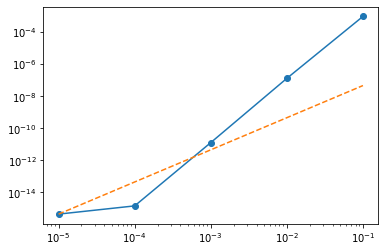

In [122]:
from tqdm import tqdm

dts = [0.00001,0.0001,0.001,0.01,0.1]
err = []
Nt = int(np.ceil(1.0 * np.pi / dt))
print(Nt)
Nt = 10

for dt in tqdm(dts):
    t = np.arange(Nt+1)*dt
    x = np.zeros((Nt+1))
    v = np.zeros((Nt+1))
    v[0] = 1.0
    intermediate = np.zeros((Nt+1))

    xth = np.sin(t)
    vth = np.cos(t)
    
    eth = 0.5*xth**2 + 0.5*vth**2

    _, _, energy = sVerlet(x,v,dt)
    err_in_energy = np.abs(energy - eth).max()
    err.append(err_in_energy)
    
print(err[0])
err_th = [ (10**expn)**2 for expn in range(len(dts))]
print(err_th)
err_th = np.array(err_th) * err[0]

print(np.log(err) / np.log(dts))

plt.figure()
plt.loglog(dts, err, '-o')
plt.loglog(dts, err_th, '--')
plt.loglog()
plt.show()

## Further reading

The implicit and explicit Euler methods are part of a family of numerical integrators called the [*Runge-Kutta*](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) methods. The generalised Runge-Kutta method allows us to build higher-order integrators, and Wikipedia has such [a list](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods). You will come across the Runge-Kutta methods frequently, especially as time integrators. We will go more in detail when we move on to numerical solution of PDEs later in this tutorial.

## References
[1] Benedict Leimkuhler and Sebastian Reich. Simulating Hamiltonian Dynamics. Cambridge Monographs on Applied and Computational Mathematics. Cambridge University Press, 2005.

[2] Ernst Hairer, Christian Lubich, and Gerhard Wanner. Geometric Numerical Integration: Structure-Preserving Algorithms for Ordinary Diﬀerential Equations; 2nd ed. Springer, Dordrecht, 2006.